## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt

## Exploratory Analysis

In [2]:
# Load the preprocessed data
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


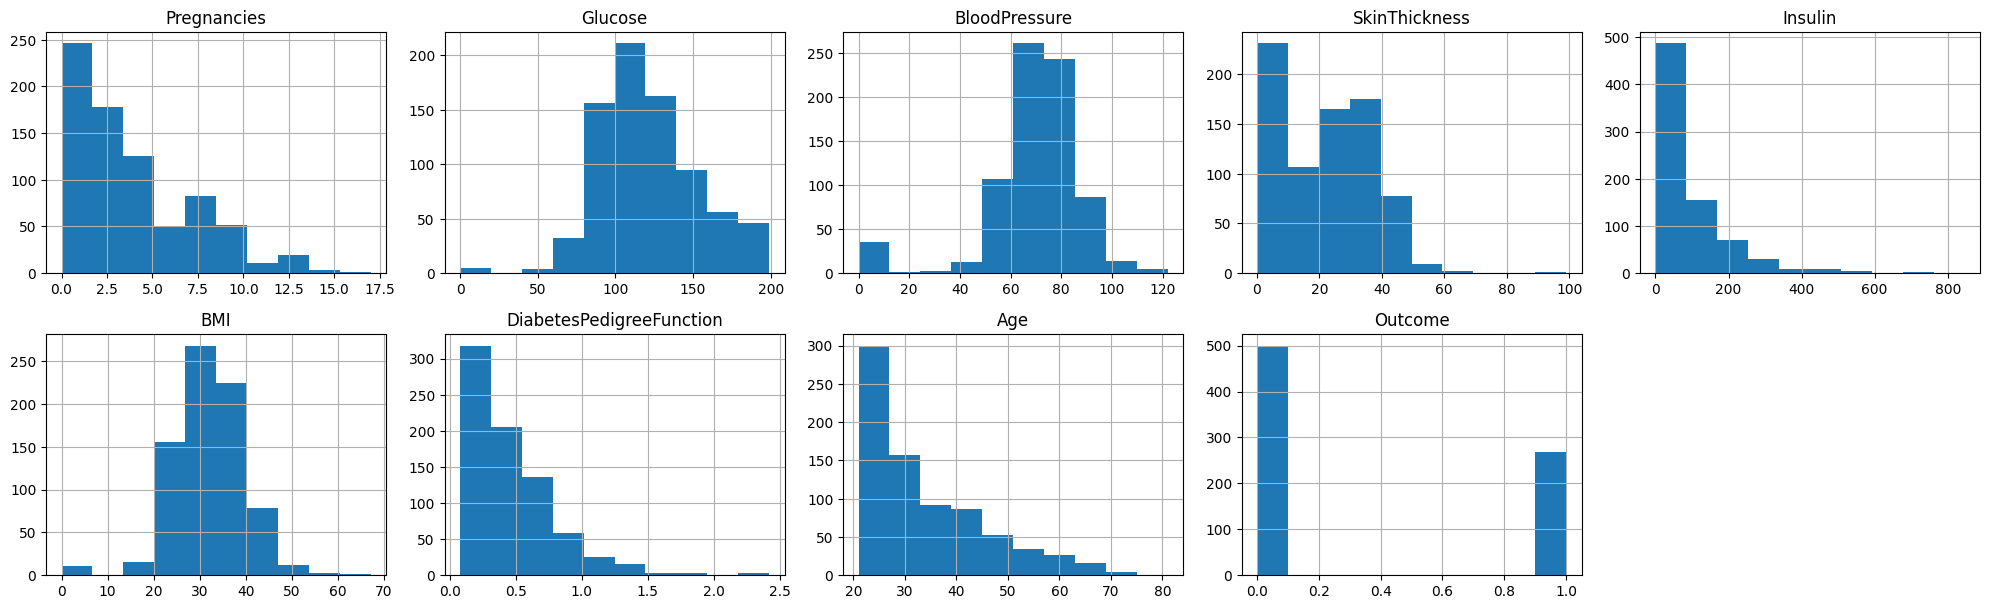

In [3]:
# plt.figure(figsize=(10, 9))
# diabetes_data.hist()
# plt.show()

# Create subplots and adjusting layout as our daqta has multiple features.
diabetes_data.hist(layout=(4, 5), figsize=(20, 12))  # 4x5 grid layout
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


## Data Pre-Processing and Standardization

In [4]:
diabetes_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# ERtracting the target class labels from the diabetes_data DataFrame and assigning them to the variable class_labels, while the remaining columns (features) to features_data.
main_class_labels = diabetes_data['Outcome']
features_data = diabetes_data.drop('Outcome', axis=1)

In [7]:
# Normalizing and standardizing all the features extracted in features_data
features_data = (features_data - features_data.mean()) / features_data.std()

In [8]:
# Converting our dataframes to PyTorch tensors
main_class_labels = torch.FloatTensor(main_class_labels.values)
features_data = torch.FloatTensor(features_data.values)

In [9]:
# Splitting the data into training and validation sets
diabetes_dataset = TensorDataset(features_data, main_class_labels)
train_size = int(0.8 * len(diabetes_dataset))
val_size = len(diabetes_dataset) - train_size
train_dataset, val_dataset = random_split(diabetes_dataset, [train_size, val_size])

In [10]:
# Splitting the feature data and target labels into a separate test dataset
train_features, test_features = features_data[:train_size], features_data[train_size:]
train_labels, test_labels = main_class_labels[:train_size], main_class_labels[train_size:]

In [11]:
# Creating our data loaders for our model (Can experiment on these to achieve best possible accuracy, the below are the values that gave me the best results)
batch_size = 128
loader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
loader_val = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)  # No need to shuffle the validation data

## Defining the model

In [12]:
# Define a more complex neural network model with dropout
class NNetwork(nn.Module):
    def __init__(self, input_dimensions, hidden_dimensions, output_dimensions):
        super(NNetwork, self).__init__()
        self.layer1 = nn.Linear(input_dimensions, hidden_dimensions)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_dimensions, hidden_dimensions)
        self.layer3 = nn.Linear(hidden_dimensions, hidden_dimensions)
        self.layer4 = nn.Linear(hidden_dimensions, output_dimensions)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        x = self.relu(x)
        x = self.layer4(x)

        return torch.sigmoid(x)

In [13]:
# Initializing our Parameters
epochs = 100
learning_rate = 0.001
input_dimensions = features_data.shape[1]
hidden_dimensions = 128
output_dimensions = 1  

## Initializing the model

In [14]:
# Initialize the model, loss function, and optimizer
model = NNetwork(input_dimensions, hidden_dimensions, output_dimensions)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
# Training loop begins
for epoch in range(0, epochs):
    for batch_X, batch_y in loader_train:
        optimizer.zero_grad()
        pred = model(batch_X)
        loss_fn = criterion(pred, batch_y.view(-1, 1))
        loss_fn.backward()
        optimizer.step()
    
    # Printing the loss happened during each epoch
    print(f'Epoch -> {epoch + 1} / {epochs} \n Calulated loss-> {loss_fn.item()} \n')

Epoch -> 1 / 100 
 Calulated loss-> 0.6488526463508606 

Epoch -> 2 / 100 
 Calulated loss-> 0.5924406051635742 

Epoch -> 3 / 100 
 Calulated loss-> 0.5341285467147827 

Epoch -> 4 / 100 
 Calulated loss-> 0.4282808005809784 

Epoch -> 5 / 100 
 Calulated loss-> 0.49522167444229126 

Epoch -> 6 / 100 
 Calulated loss-> 0.4407133162021637 

Epoch -> 7 / 100 
 Calulated loss-> 0.48128026723861694 

Epoch -> 8 / 100 
 Calulated loss-> 0.5351516604423523 

Epoch -> 9 / 100 
 Calulated loss-> 0.4091167449951172 

Epoch -> 10 / 100 
 Calulated loss-> 0.47622445225715637 

Epoch -> 11 / 100 
 Calulated loss-> 0.45804181694984436 

Epoch -> 12 / 100 
 Calulated loss-> 0.36061927676200867 

Epoch -> 13 / 100 
 Calulated loss-> 0.39549344778060913 

Epoch -> 14 / 100 
 Calulated loss-> 0.42567530274391174 

Epoch -> 15 / 100 
 Calulated loss-> 0.42158079147338867 

Epoch -> 16 / 100 
 Calulated loss-> 0.39283546805381775 

Epoch -> 17 / 100 
 Calulated loss-> 0.3661344647407532 

Epoch -> 18 / 

Epoch -> 46 / 100 
 Calulated loss-> 0.20450814068317413 

Epoch -> 47 / 100 
 Calulated loss-> 0.17732706665992737 

Epoch -> 48 / 100 
 Calulated loss-> 0.20994070172309875 

Epoch -> 49 / 100 
 Calulated loss-> 0.19359222054481506 

Epoch -> 50 / 100 
 Calulated loss-> 0.20358020067214966 

Epoch -> 51 / 100 
 Calulated loss-> 0.22199387848377228 

Epoch -> 52 / 100 
 Calulated loss-> 0.18567810952663422 

Epoch -> 53 / 100 
 Calulated loss-> 0.15441393852233887 

Epoch -> 54 / 100 
 Calulated loss-> 0.1954578012228012 

Epoch -> 55 / 100 
 Calulated loss-> 0.19649086892604828 

Epoch -> 56 / 100 
 Calulated loss-> 0.16312217712402344 

Epoch -> 57 / 100 
 Calulated loss-> 0.11190055310726166 

Epoch -> 58 / 100 
 Calulated loss-> 0.13629429042339325 

Epoch -> 59 / 100 
 Calulated loss-> 0.11425726860761642 

Epoch -> 60 / 100 
 Calulated loss-> 0.13446162641048431 

Epoch -> 61 / 100 
 Calulated loss-> 0.1263626366853714 

Epoch -> 62 / 100 
 Calulated loss-> 0.1411975473165512 



## Accuracy Calculation

In [16]:
# Evaluating the performance of our model
model.eval()

with torch.no_grad():
    pred_labels_train = model(train_features)

    # Convert probabilities to binary predictions
    pred_labels_train = (pred_labels_train > 0.5).float()  
    train_acc = (pred_labels_train == train_labels.view(-1, 1)).sum().item() / len(train_labels)
    
    # Calculate accuracy and store it as a decimal
    train_acc = train_acc * 100
    accuracy_str = "{:.2f}".format(train_acc)
    msg = "Accuracy obtained on our train data set: " + accuracy_str + "%"

    print(msg)


Accuracy obtained on our train data set: 94.30%


In [17]:
# Evaluating the performance of our model
model.eval()

with torch.no_grad():
    pred_labels_test = model(test_features)

    # Convert probabilities to binary predictions
    pred_labels_test = (pred_labels_test > 0.5).float()  
    acc = (pred_labels_test == test_labels.view(-1, 1)).sum().item() / len(test_labels)
    
    # Calculate accuracy and store it as a decimal
    test_accuracy = acc * 100
    accuracy_str = "{:.2f}".format(test_accuracy)
    msg = "Accuracy obtained on our test data set: " + accuracy_str + "%"

    print(msg)



Accuracy obtained on our test data set: 94.81%


## Calculating ROC curve and confusion matrix

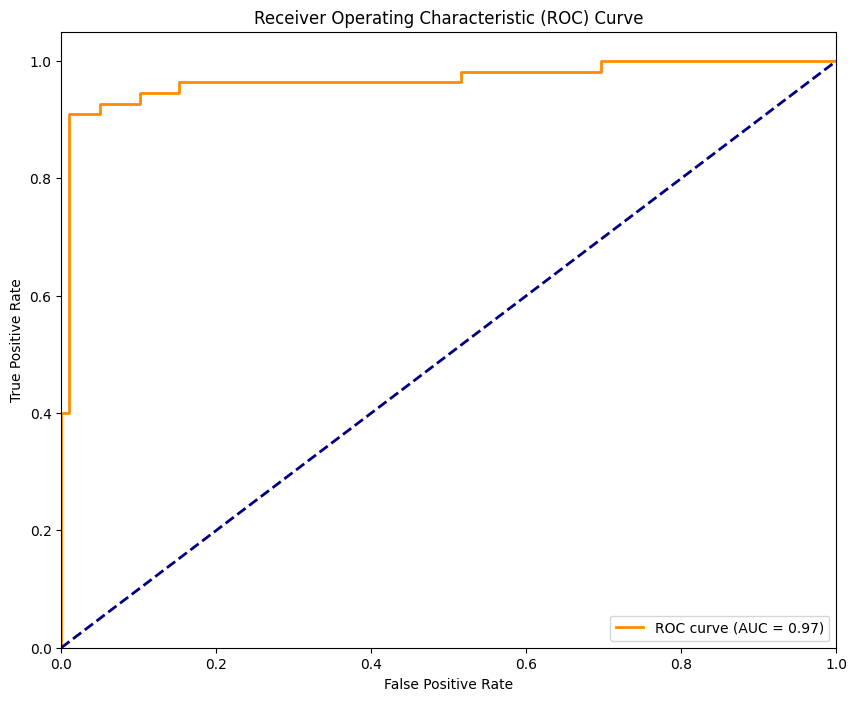

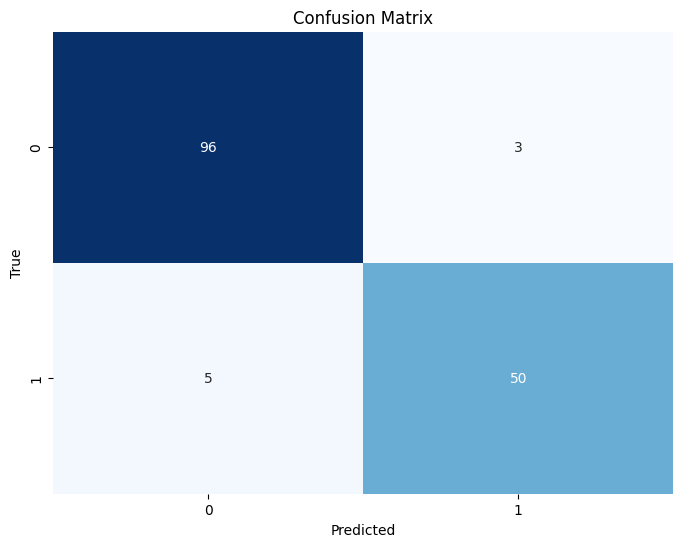

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

# Calculate ROC curve and AUC
model.eval()
with torch.no_grad():
    y_scores = model(test_features).numpy()
    fpr, tpr, _ = roc_curve(test_labels, y_scores)
    roc_auc = auc(fpr, tpr)

# Create ROC curve plot
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and plot confusion matrix
pred_labels = (y_scores > 0.5).astype(int)
cm = confusion_matrix(test_labels, pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Model as Function (for our multiple tests)

In [21]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt

def model_exp(batch_size = 128, learning_rate = 0.001, hidden_dimensions = 128):
    diabetes_data = pd.read_csv('diabetes.csv')

    main_class_labels = diabetes_data['Outcome']
    features_data = diabetes_data.drop('Outcome', axis=1)

    features_data = (features_data - features_data.mean()) / features_data.std()

    main_class_labels = torch.FloatTensor(main_class_labels.values)
    features_data = torch.FloatTensor(features_data.values)
    
    diabetes_dataset = TensorDataset(features_data, main_class_labels)
    train_size = int(0.8 * len(diabetes_dataset))
    val_size = len(diabetes_dataset) - train_size
    train_dataset, val_dataset = random_split(diabetes_dataset, [train_size, val_size])

    train_features, test_features = features_data[:train_size], features_data[train_size:]
    train_labels, test_labels = main_class_labels[:train_size], main_class_labels[train_size:]

    loader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    loader_val = DataLoader(val_dataset, batch_size=batch_size, shuffle=False) 

    class NNetwork(nn.Module):
        def __init__(self, input_dimensions, hidden_dimensions, output_dimensions):
            super(NNetwork, self).__init__()
            self.layer1 = nn.Linear(input_dimensions, hidden_dimensions)
            self.relu = nn.ReLU()
            self.layer2 = nn.Linear(hidden_dimensions, hidden_dimensions)
            self.layer3 = nn.Linear(hidden_dimensions, hidden_dimensions)
            self.layer4 = nn.Linear(hidden_dimensions, output_dimensions)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = self.layer1(x)
            x = self.relu(x)
            x = self.layer2(x)
            x = self.relu(x)
            x = self.layer3(x)
            x = self.relu(x)
            x = self.layer4(x)

            return torch.sigmoid(x)
        
    epochs = 100
    input_dimensions = features_data.shape[1]
    output_dimensions = 1  

    model = NNetwork(input_dimensions, hidden_dimensions, output_dimensions)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(0, epochs):
        for batch_X, batch_y in loader_train:
            optimizer.zero_grad()
            pred = model(batch_X)
            loss_fn = criterion(pred, batch_y.view(-1, 1))
            loss_fn.backward()
            optimizer.step()
        
        # Printing the loss happened during each epoch
        print(f'Epoch -> {epoch + 1} / {epochs} \n Calulated loss-> {loss_fn.item()} \n')


    # Evaluating the performance of our model
    model.eval()

    with torch.no_grad():
        pred_labels_train = model(train_features)

        # Convert probabilities to binary predictions
        pred_labels_train = (pred_labels_train > 0.5).float()  
        train_acc = (pred_labels_train == train_labels.view(-1, 1)).sum().item() / len(train_labels)
        
        # Calculate accuracy and store it as a decimal
        train_acc = train_acc * 100
        accuracy_str = "{:.2f}".format(train_acc)
        msg = "Accuracy obtained on our train data set: " + accuracy_str + "%"

        print(msg)
    model.eval()

    with torch.no_grad():
        pred_labels_test = model(test_features)

        # Convert probabilities to binary predictions
        pred_labels_test = (pred_labels_test > 0.5).float()  
        acc = (pred_labels_test == test_labels.view(-1, 1)).sum().item() / len(test_labels)
        
        # Calculate accuracy and store it as a decimal
        test_accuracy = acc * 100
        accuracy_str = "{:.2f}".format(test_accuracy)
        msg = "Accuracy obtained on our test data set: " + accuracy_str + "%"

        print(msg)


First, we begin by experimenting with batch size, keeping the learning rate at 0.001 and hidden dimensions at 128. Below are our observations

In [23]:
model_exp(batch_size = 32, learning_rate = 0.001, hidden_dimensions = 128)

Epoch -> 1 / 100 
 Calulated loss-> 0.5569428205490112 

Epoch -> 2 / 100 
 Calulated loss-> 0.4059431552886963 

Epoch -> 3 / 100 
 Calulated loss-> 0.6526002287864685 

Epoch -> 4 / 100 
 Calulated loss-> 0.18997283279895782 

Epoch -> 5 / 100 
 Calulated loss-> 0.637814462184906 

Epoch -> 6 / 100 
 Calulated loss-> 0.16695471107959747 

Epoch -> 7 / 100 
 Calulated loss-> 0.36461758613586426 

Epoch -> 8 / 100 
 Calulated loss-> 0.44995132088661194 

Epoch -> 9 / 100 
 Calulated loss-> 0.2678816616535187 

Epoch -> 10 / 100 
 Calulated loss-> 0.4369148015975952 

Epoch -> 11 / 100 
 Calulated loss-> 0.5550379753112793 

Epoch -> 12 / 100 
 Calulated loss-> 0.4226208031177521 

Epoch -> 13 / 100 
 Calulated loss-> 0.08765366673469543 

Epoch -> 14 / 100 
 Calulated loss-> 0.1442960947751999 

Epoch -> 15 / 100 
 Calulated loss-> 0.24477644264698029 

Epoch -> 16 / 100 
 Calulated loss-> 0.4847951829433441 

Epoch -> 17 / 100 
 Calulated loss-> 0.2878338396549225 

Epoch -> 18 / 100 

In [24]:
model_exp(batch_size = 64, learning_rate = 0.001, hidden_dimensions = 128)

Epoch -> 1 / 100 
 Calulated loss-> 0.6266089677810669 

Epoch -> 2 / 100 
 Calulated loss-> 0.5626457929611206 

Epoch -> 3 / 100 
 Calulated loss-> 0.45309484004974365 

Epoch -> 4 / 100 
 Calulated loss-> 0.5366725921630859 

Epoch -> 5 / 100 
 Calulated loss-> 0.3249427080154419 

Epoch -> 6 / 100 
 Calulated loss-> 0.29098302125930786 

Epoch -> 7 / 100 
 Calulated loss-> 0.5557126998901367 

Epoch -> 8 / 100 
 Calulated loss-> 0.3480624854564667 

Epoch -> 9 / 100 
 Calulated loss-> 0.370771199464798 

Epoch -> 10 / 100 
 Calulated loss-> 0.2883690893650055 

Epoch -> 11 / 100 
 Calulated loss-> 0.5694560408592224 

Epoch -> 12 / 100 
 Calulated loss-> 0.3569464683532715 

Epoch -> 13 / 100 
 Calulated loss-> 0.33255404233932495 

Epoch -> 14 / 100 
 Calulated loss-> 0.23358304798603058 

Epoch -> 15 / 100 
 Calulated loss-> 0.3526257574558258 

Epoch -> 16 / 100 
 Calulated loss-> 0.3535328507423401 

Epoch -> 17 / 100 
 Calulated loss-> 0.4965927302837372 

Epoch -> 18 / 100 
 

In [25]:
model_exp(batch_size = 128, learning_rate = 0.001, hidden_dimensions = 128)

Epoch -> 1 / 100 
 Calulated loss-> 0.6703561544418335 

Epoch -> 2 / 100 
 Calulated loss-> 0.5914352536201477 

Epoch -> 3 / 100 
 Calulated loss-> 0.5610613226890564 

Epoch -> 4 / 100 
 Calulated loss-> 0.5792034864425659 

Epoch -> 5 / 100 
 Calulated loss-> 0.5045128464698792 

Epoch -> 6 / 100 
 Calulated loss-> 0.4824988842010498 

Epoch -> 7 / 100 
 Calulated loss-> 0.4721742272377014 

Epoch -> 8 / 100 
 Calulated loss-> 0.49112609028816223 

Epoch -> 9 / 100 
 Calulated loss-> 0.33851489424705505 

Epoch -> 10 / 100 
 Calulated loss-> 0.4778050482273102 

Epoch -> 11 / 100 
 Calulated loss-> 0.5005056262016296 

Epoch -> 12 / 100 
 Calulated loss-> 0.3753597140312195 

Epoch -> 13 / 100 
 Calulated loss-> 0.46426814794540405 

Epoch -> 14 / 100 
 Calulated loss-> 0.4492071568965912 

Epoch -> 15 / 100 
 Calulated loss-> 0.4946521818637848 

Epoch -> 16 / 100 
 Calulated loss-> 0.37324851751327515 

Epoch -> 17 / 100 
 Calulated loss-> 0.382267564535141 

Epoch -> 18 / 100 
 

In [26]:
model_exp(batch_size = 256, learning_rate = 0.001, hidden_dimensions = 128)

Epoch -> 1 / 100 
 Calulated loss-> 0.6728171706199646 

Epoch -> 2 / 100 
 Calulated loss-> 0.636944591999054 

Epoch -> 3 / 100 
 Calulated loss-> 0.6083332300186157 

Epoch -> 4 / 100 
 Calulated loss-> 0.5155858397483826 

Epoch -> 5 / 100 
 Calulated loss-> 0.5159921050071716 

Epoch -> 6 / 100 
 Calulated loss-> 0.5239692330360413 

Epoch -> 7 / 100 
 Calulated loss-> 0.4490055739879608 

Epoch -> 8 / 100 
 Calulated loss-> 0.36812248826026917 

Epoch -> 9 / 100 
 Calulated loss-> 0.37654760479927063 

Epoch -> 10 / 100 
 Calulated loss-> 0.43383580446243286 

Epoch -> 11 / 100 
 Calulated loss-> 0.41076934337615967 

Epoch -> 12 / 100 
 Calulated loss-> 0.5252668261528015 

Epoch -> 13 / 100 
 Calulated loss-> 0.4393395781517029 

Epoch -> 14 / 100 
 Calulated loss-> 0.44740059971809387 

Epoch -> 15 / 100 
 Calulated loss-> 0.42988884449005127 

Epoch -> 16 / 100 
 Calulated loss-> 0.4210677444934845 

Epoch -> 17 / 100 
 Calulated loss-> 0.4051588475704193 

Epoch -> 18 / 100 

Proceeding to the second phase of our tests, we will conduct tests on our learning rate while keeping our batch size fixed at 128, and hidden dimensions at 128.

In [27]:
model_exp(batch_size = 128, learning_rate = 0.001, hidden_dimensions = 128)

Epoch -> 1 / 100 
 Calulated loss-> 0.6496358513832092 

Epoch -> 2 / 100 
 Calulated loss-> 0.5885719060897827 

Epoch -> 3 / 100 
 Calulated loss-> 0.5305554866790771 

Epoch -> 4 / 100 
 Calulated loss-> 0.5317286252975464 

Epoch -> 5 / 100 
 Calulated loss-> 0.5194026231765747 

Epoch -> 6 / 100 
 Calulated loss-> 0.4736051857471466 

Epoch -> 7 / 100 
 Calulated loss-> 0.418326199054718 

Epoch -> 8 / 100 
 Calulated loss-> 0.4643930494785309 

Epoch -> 9 / 100 
 Calulated loss-> 0.44795119762420654 

Epoch -> 10 / 100 
 Calulated loss-> 0.4376227557659149 

Epoch -> 11 / 100 
 Calulated loss-> 0.428832083940506 

Epoch -> 12 / 100 
 Calulated loss-> 0.4766980707645416 

Epoch -> 13 / 100 
 Calulated loss-> 0.39182448387145996 

Epoch -> 14 / 100 
 Calulated loss-> 0.5389652848243713 

Epoch -> 15 / 100 
 Calulated loss-> 0.39872244000434875 

Epoch -> 16 / 100 
 Calulated loss-> 0.4690876305103302 

Epoch -> 17 / 100 
 Calulated loss-> 0.3606600761413574 

Epoch -> 18 / 100 
 Ca

In [28]:
model_exp(batch_size = 128, learning_rate = 0.005, hidden_dimensions = 128)

Epoch -> 1 / 100 
 Calulated loss-> 0.5071704983711243 

Epoch -> 2 / 100 
 Calulated loss-> 0.4493996500968933 

Epoch -> 3 / 100 
 Calulated loss-> 0.4744187593460083 

Epoch -> 4 / 100 
 Calulated loss-> 0.395621657371521 

Epoch -> 5 / 100 
 Calulated loss-> 0.4585369825363159 

Epoch -> 6 / 100 
 Calulated loss-> 0.43336284160614014 

Epoch -> 7 / 100 
 Calulated loss-> 0.39791038632392883 

Epoch -> 8 / 100 
 Calulated loss-> 0.4277035593986511 

Epoch -> 9 / 100 
 Calulated loss-> 0.39654111862182617 

Epoch -> 10 / 100 
 Calulated loss-> 0.3886041045188904 

Epoch -> 11 / 100 
 Calulated loss-> 0.48726004362106323 

Epoch -> 12 / 100 
 Calulated loss-> 0.45684996247291565 

Epoch -> 13 / 100 
 Calulated loss-> 0.35719752311706543 

Epoch -> 14 / 100 
 Calulated loss-> 0.4288140833377838 

Epoch -> 15 / 100 
 Calulated loss-> 0.3622182309627533 

Epoch -> 16 / 100 
 Calulated loss-> 0.3777683973312378 

Epoch -> 17 / 100 
 Calulated loss-> 0.35886603593826294 

Epoch -> 18 / 100

In [29]:
model_exp(batch_size = 128, learning_rate = 0.01, hidden_dimensions = 128)

Epoch -> 1 / 100 
 Calulated loss-> 0.5277203917503357 

Epoch -> 2 / 100 
 Calulated loss-> 0.4239949882030487 

Epoch -> 3 / 100 
 Calulated loss-> 0.44996777176856995 

Epoch -> 4 / 100 
 Calulated loss-> 0.5361369252204895 

Epoch -> 5 / 100 
 Calulated loss-> 0.4484978914260864 

Epoch -> 6 / 100 
 Calulated loss-> 0.33709242939949036 

Epoch -> 7 / 100 
 Calulated loss-> 0.4337051212787628 

Epoch -> 8 / 100 
 Calulated loss-> 0.4180997312068939 

Epoch -> 9 / 100 
 Calulated loss-> 0.33943694829940796 

Epoch -> 10 / 100 
 Calulated loss-> 0.3082610070705414 

Epoch -> 11 / 100 
 Calulated loss-> 0.2906857430934906 

Epoch -> 12 / 100 
 Calulated loss-> 0.29260674118995667 

Epoch -> 13 / 100 
 Calulated loss-> 0.28331130743026733 

Epoch -> 14 / 100 
 Calulated loss-> 0.28827759623527527 

Epoch -> 15 / 100 
 Calulated loss-> 0.23583050072193146 

Epoch -> 16 / 100 
 Calulated loss-> 0.30623966455459595 

Epoch -> 17 / 100 
 Calulated loss-> 0.23159590363502502 

Epoch -> 18 / 

In [30]:
model_exp(batch_size = 128, learning_rate = 0.05, hidden_dimensions = 128)

Epoch -> 1 / 100 
 Calulated loss-> 0.8769762516021729 

Epoch -> 2 / 100 
 Calulated loss-> 0.5771526098251343 

Epoch -> 3 / 100 
 Calulated loss-> 0.5357623100280762 

Epoch -> 4 / 100 
 Calulated loss-> 0.5583117008209229 

Epoch -> 5 / 100 
 Calulated loss-> 0.402128666639328 

Epoch -> 6 / 100 
 Calulated loss-> 0.48822957277297974 

Epoch -> 7 / 100 
 Calulated loss-> 0.396198034286499 

Epoch -> 8 / 100 
 Calulated loss-> 0.3889647126197815 

Epoch -> 9 / 100 
 Calulated loss-> 0.4239603281021118 

Epoch -> 10 / 100 
 Calulated loss-> 0.3982952833175659 

Epoch -> 11 / 100 
 Calulated loss-> 0.40933847427368164 

Epoch -> 12 / 100 
 Calulated loss-> 0.3807232677936554 

Epoch -> 13 / 100 
 Calulated loss-> 0.354525089263916 

Epoch -> 14 / 100 
 Calulated loss-> 0.3432881534099579 

Epoch -> 15 / 100 
 Calulated loss-> 0.354526549577713 

Epoch -> 16 / 100 
 Calulated loss-> 0.3870987892150879 

Epoch -> 17 / 100 
 Calulated loss-> 0.33360612392425537 

Epoch -> 18 / 100 
 Calu

In [32]:
model_exp(batch_size = 128, learning_rate = 0.1, hidden_dimensions = 128)

Epoch -> 1 / 100 
 Calulated loss-> 1.2083324193954468 

Epoch -> 2 / 100 
 Calulated loss-> 0.7288104295730591 

Epoch -> 3 / 100 
 Calulated loss-> 0.6318182349205017 

Epoch -> 4 / 100 
 Calulated loss-> 0.6173970699310303 

Epoch -> 5 / 100 
 Calulated loss-> 0.5056398510932922 

Epoch -> 6 / 100 
 Calulated loss-> 0.5457708835601807 

Epoch -> 7 / 100 
 Calulated loss-> 0.6147470474243164 

Epoch -> 8 / 100 
 Calulated loss-> 0.4886538088321686 

Epoch -> 9 / 100 
 Calulated loss-> 0.589168906211853 

Epoch -> 10 / 100 
 Calulated loss-> 0.5646003484725952 

Epoch -> 11 / 100 
 Calulated loss-> 0.5909991264343262 

Epoch -> 12 / 100 
 Calulated loss-> 0.4472704529762268 

Epoch -> 13 / 100 
 Calulated loss-> 0.49699866771698 

Epoch -> 14 / 100 
 Calulated loss-> 0.5385821461677551 

Epoch -> 15 / 100 
 Calulated loss-> 0.47687628865242004 

Epoch -> 16 / 100 
 Calulated loss-> 1.1505651473999023 

Epoch -> 17 / 100 
 Calulated loss-> 0.5665263533592224 

Epoch -> 18 / 100 
 Calul

In [34]:
model_exp(batch_size = 128, learning_rate = 0.5, hidden_dimensions = 128)

Epoch -> 1 / 100 
 Calulated loss-> 40.19607925415039 

Epoch -> 2 / 100 
 Calulated loss-> 37.25490188598633 

Epoch -> 3 / 100 
 Calulated loss-> 40.19607925415039 

Epoch -> 4 / 100 
 Calulated loss-> 28.431371688842773 

Epoch -> 5 / 100 
 Calulated loss-> 30.39215660095215 

Epoch -> 6 / 100 
 Calulated loss-> 32.35293960571289 

Epoch -> 7 / 100 
 Calulated loss-> 31.372549057006836 

Epoch -> 8 / 100 
 Calulated loss-> 28.431371688842773 

Epoch -> 9 / 100 
 Calulated loss-> 31.372549057006836 

Epoch -> 10 / 100 
 Calulated loss-> 29.41176414489746 

Epoch -> 11 / 100 
 Calulated loss-> 32.35293960571289 

Epoch -> 12 / 100 
 Calulated loss-> 41.17647171020508 

Epoch -> 13 / 100 
 Calulated loss-> 39.2156867980957 

Epoch -> 14 / 100 
 Calulated loss-> 39.2156867980957 

Epoch -> 15 / 100 
 Calulated loss-> 34.313724517822266 

Epoch -> 16 / 100 
 Calulated loss-> 32.35293960571289 

Epoch -> 17 / 100 
 Calulated loss-> 36.27450942993164 

Epoch -> 18 / 100 
 Calulated loss-> 

Moving on to our last phase of the experiment, we have already come to the conclusion that a learning rate of 0.001 and a batch size of 128 gives the most optimum results, so we will try to find out the optimum value of hidden dimensions as well. Below are our observations:

In [38]:
model_exp(batch_size = 128, learning_rate = 0.001, hidden_dimensions = 32)

Epoch -> 1 / 100 
 Calulated loss-> 0.6989383101463318 

Epoch -> 2 / 100 
 Calulated loss-> 0.6894504427909851 

Epoch -> 3 / 100 
 Calulated loss-> 0.673811674118042 

Epoch -> 4 / 100 
 Calulated loss-> 0.6649897694587708 

Epoch -> 5 / 100 
 Calulated loss-> 0.654812753200531 

Epoch -> 6 / 100 
 Calulated loss-> 0.6299846172332764 

Epoch -> 7 / 100 
 Calulated loss-> 0.6224112510681152 

Epoch -> 8 / 100 
 Calulated loss-> 0.5626813769340515 

Epoch -> 9 / 100 
 Calulated loss-> 0.5996699333190918 

Epoch -> 10 / 100 
 Calulated loss-> 0.5552461743354797 

Epoch -> 11 / 100 
 Calulated loss-> 0.5101260542869568 

Epoch -> 12 / 100 
 Calulated loss-> 0.511527955532074 

Epoch -> 13 / 100 
 Calulated loss-> 0.5125942826271057 

Epoch -> 14 / 100 
 Calulated loss-> 0.46747732162475586 

Epoch -> 15 / 100 
 Calulated loss-> 0.5465288162231445 

Epoch -> 16 / 100 
 Calulated loss-> 0.3848555386066437 

Epoch -> 17 / 100 
 Calulated loss-> 0.4616631269454956 

Epoch -> 18 / 100 
 Calul

In [39]:
model_exp(batch_size = 128, learning_rate = 0.001, hidden_dimensions = 64)

Epoch -> 1 / 100 
 Calulated loss-> 0.6822306513786316 

Epoch -> 2 / 100 
 Calulated loss-> 0.6749412417411804 

Epoch -> 3 / 100 
 Calulated loss-> 0.663971483707428 

Epoch -> 4 / 100 
 Calulated loss-> 0.5858058333396912 

Epoch -> 5 / 100 
 Calulated loss-> 0.5705708861351013 

Epoch -> 6 / 100 
 Calulated loss-> 0.5626147389411926 

Epoch -> 7 / 100 
 Calulated loss-> 0.5542808771133423 

Epoch -> 8 / 100 
 Calulated loss-> 0.5282098650932312 

Epoch -> 9 / 100 
 Calulated loss-> 0.48704901337623596 

Epoch -> 10 / 100 
 Calulated loss-> 0.4396744668483734 

Epoch -> 11 / 100 
 Calulated loss-> 0.5488182902336121 

Epoch -> 12 / 100 
 Calulated loss-> 0.5234262347221375 

Epoch -> 13 / 100 
 Calulated loss-> 0.49243858456611633 

Epoch -> 14 / 100 
 Calulated loss-> 0.49626320600509644 

Epoch -> 15 / 100 
 Calulated loss-> 0.5218862295150757 

Epoch -> 16 / 100 
 Calulated loss-> 0.41978776454925537 

Epoch -> 17 / 100 
 Calulated loss-> 0.4750896394252777 

Epoch -> 18 / 100 
 

In [40]:
model_exp(batch_size = 128, learning_rate = 0.001, hidden_dimensions = 128)

Epoch -> 1 / 100 
 Calulated loss-> 0.65383380651474 

Epoch -> 2 / 100 
 Calulated loss-> 0.5686885714530945 

Epoch -> 3 / 100 
 Calulated loss-> 0.5073729753494263 

Epoch -> 4 / 100 
 Calulated loss-> 0.5044143795967102 

Epoch -> 5 / 100 
 Calulated loss-> 0.4367159903049469 

Epoch -> 6 / 100 
 Calulated loss-> 0.4401845633983612 

Epoch -> 7 / 100 
 Calulated loss-> 0.500535249710083 

Epoch -> 8 / 100 
 Calulated loss-> 0.492024302482605 

Epoch -> 9 / 100 
 Calulated loss-> 0.3809547424316406 

Epoch -> 10 / 100 
 Calulated loss-> 0.43474915623664856 

Epoch -> 11 / 100 
 Calulated loss-> 0.49549973011016846 

Epoch -> 12 / 100 
 Calulated loss-> 0.40851524472236633 

Epoch -> 13 / 100 
 Calulated loss-> 0.47162553668022156 

Epoch -> 14 / 100 
 Calulated loss-> 0.37347424030303955 

Epoch -> 15 / 100 
 Calulated loss-> 0.36959850788116455 

Epoch -> 16 / 100 
 Calulated loss-> 0.37330859899520874 

Epoch -> 17 / 100 
 Calulated loss-> 0.4731694161891937 

Epoch -> 18 / 100 
 

In [41]:
model_exp(batch_size = 128, learning_rate = 0.001, hidden_dimensions = 256)

Epoch -> 1 / 100 
 Calulated loss-> 0.6227174401283264 

Epoch -> 2 / 100 
 Calulated loss-> 0.609898567199707 

Epoch -> 3 / 100 
 Calulated loss-> 0.4694173336029053 

Epoch -> 4 / 100 
 Calulated loss-> 0.4502526819705963 

Epoch -> 5 / 100 
 Calulated loss-> 0.42445898056030273 

Epoch -> 6 / 100 
 Calulated loss-> 0.5199654698371887 

Epoch -> 7 / 100 
 Calulated loss-> 0.4708144962787628 

Epoch -> 8 / 100 
 Calulated loss-> 0.4499589204788208 

Epoch -> 9 / 100 
 Calulated loss-> 0.44233232736587524 

Epoch -> 10 / 100 
 Calulated loss-> 0.43460652232170105 

Epoch -> 11 / 100 
 Calulated loss-> 0.41045960783958435 

Epoch -> 12 / 100 
 Calulated loss-> 0.43372079730033875 

Epoch -> 13 / 100 
 Calulated loss-> 0.452289879322052 

Epoch -> 14 / 100 
 Calulated loss-> 0.4261682629585266 

Epoch -> 15 / 100 
 Calulated loss-> 0.3478724956512451 

Epoch -> 16 / 100 
 Calulated loss-> 0.3060706555843353 

Epoch -> 17 / 100 
 Calulated loss-> 0.4462868273258209 

Epoch -> 18 / 100 
 